In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv(r"C:\Users\91936\Desktop\EDA\Prakhar.csv")
df.drop_duplicates(inplace = True)
df.reset_index(drop = True,inplace = True)
df.shape

(1337, 7)

In [3]:
for j in df.columns:
    for i in df.index:
        if(df.loc[i,j] == 'yes' or df.loc[i,j] == 'male'):
            df.loc[i,j] = 1
        elif(df.loc[i,j] == 'no' or df.loc[i,j] == 'female'):
            df.loc[i,j] = 0
        elif(df.loc[i,j] == 'southwest'):
            df.loc[i,j] = 0
        elif(df.loc[i,j] == 'southeast'):
            df.loc[i,j] = 1
        elif(df.loc[i,j] == 'northwest'):
            df.loc[i,j] = 2
        elif(df.loc[i,j] == 'northeast'):
            df.loc[i,j] = 3

In [4]:
df['smoker'] = pd.to_numeric(df['smoker'])
df['sex'] = pd.to_numeric(df['sex'])
df['region'] = pd.to_numeric(df['region'])

In [5]:
Q1 = np.quantile(df['charges'],0.25)
Q3 = np.quantile(df['charges'],0.75)
IQR = Q3 - Q1

for i in df.index:
    if(df.loc[i,'charges'] >= (Q3 + (IQR*1.5)) or df.loc[i,'charges'] < (Q1 - (IQR*1.5))):
        df.drop(i,axis = 0,inplace = True)
df.reset_index(drop = True, inplace = True)
df.shape

(1198, 7)

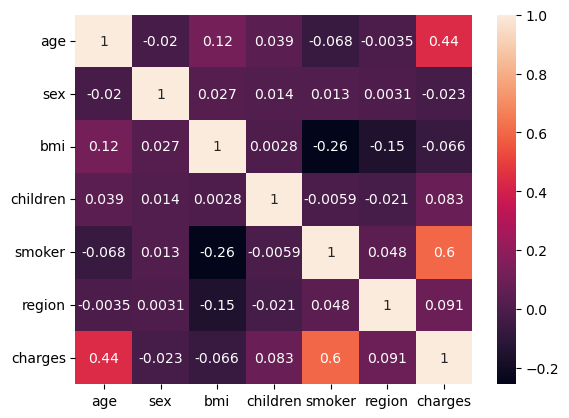

In [6]:
sns.heatmap(df.corr(),annot = True)
plt.show()

In [7]:
df.drop(['sex','bmi','children','region'],axis = 1, inplace = True)

In [8]:
df

,age,smoker,charges
0,19,1,16884.92400
1,18,0,1725.55230
2,28,0,4449.46200
3,33,0,21984.47061
4,32,0,3866.85520
...,...,...,...
1193,50,0,10600.54830
1194,18,0,2205.98080
1195,18,0,1629.83350
1196,21,0,2007.94500


In [9]:
x = df.drop('charges',axis = 1)
y = df['charges']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [11]:
model = LinearRegression()

In [12]:
algl = model.fit(x_train,y_train)

In [13]:
predictions = model.predict(x_test)

In [14]:
predictions

array([13004.40320817, 10731.07929784,  5426.65684039,  4668.88220361,
       12246.6285714 , 12246.6285714 , 23310.77661996, 18511.5372537 ,
       14519.95248173,  2900.74138446,  6437.02302276,  9720.71311547,
        3405.92447565, 21290.04425522, 13004.40320817,  2900.74138446,
        6184.43147717,  4668.88220361, 11236.26238902, 11741.44548021,
        6184.43147717, 11994.0370258 ,  6184.43147717, 11741.44548021,
        9215.53002428,  3911.10756683,  8457.7553875 , 12751.81166258,
        4416.29065802, 23310.77661996, 25836.69207589, 12246.6285714 ,
       11236.26238902, 14267.36093614,  7699.98075073,  3153.33293006,
        8962.93847869,  4668.88220361, 22553.00198318, 13509.58629936,
        9215.53002428,  8710.3469331 , 14014.76939055,  9468.12156988,
       13509.58629936, 13256.99475377,  6437.02302276, 10225.89620665,
        9468.12156988,  6437.02302276,  6437.02302276, 12246.6285714 ,
       11994.0370258 ,  3911.10756683,  3405.92447565,  5931.83993158,
      

In [15]:
accuracy = r2_score(y_test,predictions)*100
print(accuracy)

56.16434050885886


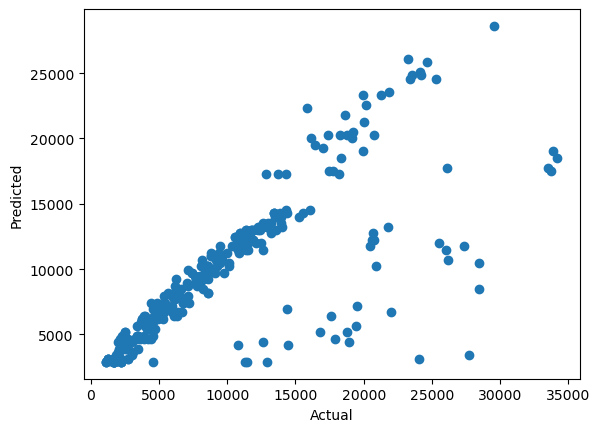

In [16]:
plt.scatter(y_test,predictions);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='charges'>

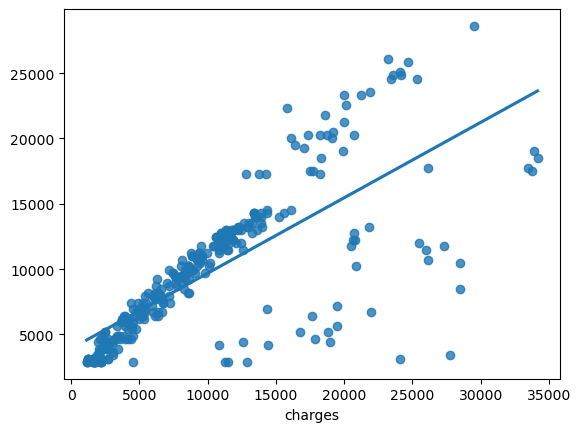

In [17]:
sns.regplot(x = y_test, y = predictions, ci = None)

In [19]:
algl.score(x_test,y_test)

0.5616434050885886

In [20]:
algl.score(x_train,y_train)

0.601604109067229